<a href="https://colab.research.google.com/github/djbradyAtOpticalSciencesArizona/computationalImaging/blob/master/inverseProblems/patternSubstitution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Imaging
### David J. Brady
### University of Arizona

### Pattern Substitution


## Libraries

In [104]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.signal import convolve2d, convolve
from skimage import color, data, restoration, exposure
from skimage import io
from google.colab import files
from scipy.special import expit
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 16})

This notebook implments matched filtering to find positions of a sad face in a background image. The match filtered image is fed into a sigmoidal activation function to identify the match positons. The activation function image is then convolved with a smile image to produce images of smiley faces at the positions of the sad faces, which are added to the image. The sad faces are subtracted using convolution with the activation image (feature map). 

## Pattern Substitution Example

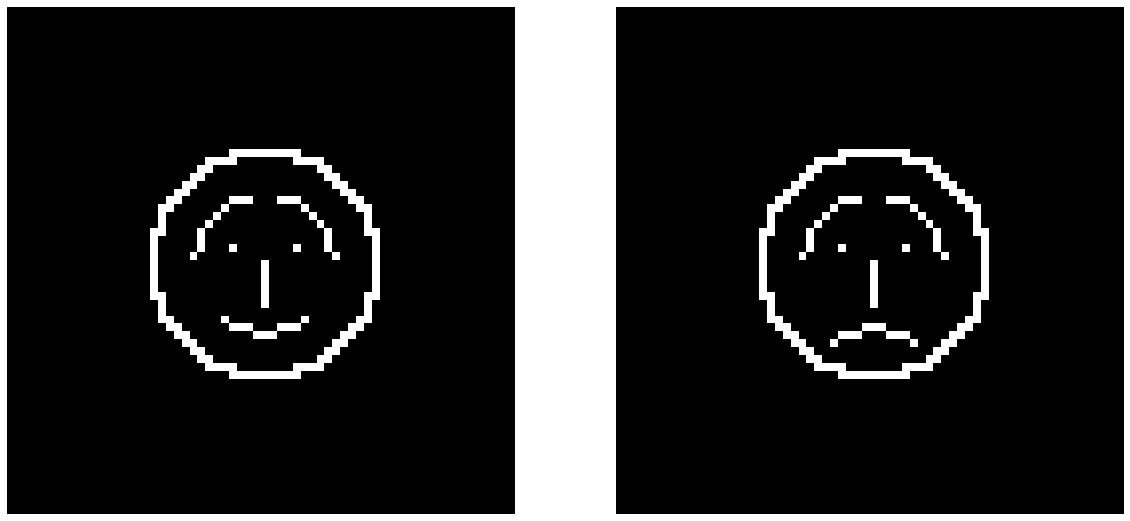

In [25]:
# target images
face=np.zeros((64,64))
for i in range(1,64):
    for j in range(1,64):
        if np.abs((i-64/2)**2+(j-64/2)**2-200)<20:
            face[i,j]=1;
        elif np.abs((i-64/2)**2+(j-64/2)**2-75)<10 & i<25:
            face[i,j]=1;
face[30,28]=1;
face[30,36]=1;
face[32:38,32]=1;
smile=face[38:44,26:40]
frown=np.flip(smile,axis=0)
sadFace=np.zeros(np.shape(face))
sadFace=sadFace+face;
sadFace[38:44,26:40]=frown;
ig, ax = plt.subplots(nrows=1, ncols=2)
for a in (ax[0], ax[1]):
       a.axis('off')

ax[0].imshow(face)

ax[1].imshow(sadFace)

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

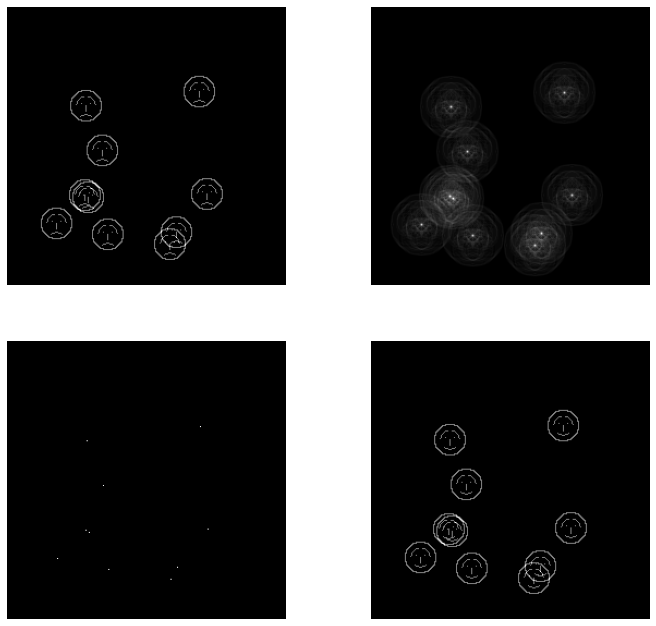

In [101]:
fig, ax = plt.subplots(nrows=2, ncols=2)
plt.rcParams['figure.figsize'] = [10, 10]
plt.gray()

for a in (ax[0,0], ax[0,1], ax[1,0], ax[1,1]):
       a.axis('off')



#
# now we add  faces to the image
#
#
x=np.random.choice(range(32,222),size=10,replace=False)
y=np.random.choice(range(32,222),size=10,replace=False)
sImage=np.zeros((256,256))
for pip in range(10):
  sImage[(x[pip]-32):(x[pip]+32),(y[pip]-32):(y[pip]+32)]=sImage[(x[pip]-32):(x[pip]+32),(y[pip]-32):(y[pip]+32)]+0.25*sadFace
ax[0,0].imshow(sImage,cmap='gray')
#
# we use matched filtering to find the faces.
#
match=convolve2d(sImage,sadFace, mode='same')
ax[0,1].imshow(match,cmap='gray')
#
# now we use an activation function to find the matches
#
featureMap=expit(10*(match-.8*np.max(match)))
ax[1,0].imshow(featureMap,cmap='gray')
#
# now replace the frowns with smiles
#
substitution=sImage+.25*convolve2d(np.roll(featureMap,(-2,-2),axis=(0,1)),face-sadFace,mode='same')
ax[1,1].imshow(substitution,cmap='gray')
fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.savefig('faces.pdf')
files.download('faces.pdf')
